<a href="https://colab.research.google.com/github/joshuagavinv/UTS_ML2019_ID13022658/blob/master/assignment2_PracticalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment Practical Project- Telecommunication Churn

Ananda Wijaya Putra - 13002581 
Joshua Gavin Valerie - 13022658

# Google Colab Notebook and Video Link

## Google Colab Notebook for the Assignment

“https://github.com/joshuagavinv/UTS_ML2019_ID13022658/blob/master/assignment2_PracticalProject.ipynb”



# DATA PROBLEM INTRODUCTION


Machine Learning and Big Data concept have been used in a lot of fields nowadays to identify / give crucial information that help the companies/actors achieve its objective. One of the trending problems is classifying rare instances in imbalanced datasets, which have been implemented, in Fraud Detection, Heart Disease, and many more. In this report, we will analyse and built a classifier for customer’s churn

The dataset is obtained from Kaggle, which contains customer who quit or unsubscribe from the services (Churn) the telecommunication company has to offer. The dataset also contains various information about customer’s data, specifically on their contract/services details.

Therefore, the main data mining problem is to predict customer that churn based on the information available from the dataset. The challenge from this though, is that since in unbalanced datasets, Machine Learning classifiers will tend to favour the majority class instead of the minority one (which is the one that we want to find in this case). In this report, through various research done on the net, we will experiment different techniques done to handle this problem, and compare 4 classifiers as the evaluation results.

The importance of this project is to allow the telecommunication company / company in general to implement a customer’s retention approach in order to keep their customers, as finding a new customer cost around 4 times than maintaining the senior one. By deploying a targeted retention approach, which possibly can be tailored to the characteristics of the customer service, we also hope that it will be more personal, as well as reflective on the company to improve that specific Churn Rate factor that can tackle the business problem.

# 1. Initialising Dataset & Initial Check


## 1.1.Importing Libraries

In [0]:
#import some necessary libraries

import numpy as np # linear algebra
import pandas as pd # Read csv & data processing
%matplotlib inline

import matplotlib.pyplot as plt  # plots
import seaborn as sns
color = sns.color_palette()
sns.set_style('whitegrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
#ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

## 1.2. Loading Dataset

In [3]:
url ='https://raw.githubusercontent.com/joshuagavinv/UTS_ML2019_ID13022658/master/Assignment2PracticalProject/Churn.csv'
dataset = pd.read_csv(url)
dataset.head(10)
dataset.shape

(7043, 21)

In [4]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 1.3. Missing value Checker
Before actually pre-processing the data, duplicate values and missing values must be identified to make the dataset valid. Therefore, it is very important to search for duplicate values and missing values among the variables.

In [5]:
# count the number of NaN values in each column
print(dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [0]:
dataset.columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## 1.4. Duplicate Values

In [0]:
dataset.duplicated().sum()

0

In [0]:
dataset.customerID.duplicated().sum()

0

## 1.5. Convert String to Float Element
As depicted in both of the figures below Total charges who values are supposed to be numerical, are classified as object. So that the data can be used according to its value, the code snapshot below convert them into float/numerical values

In [0]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors ='coerce')

In [0]:
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


As been shown in the Data Exploration section, the data doesn’t show any sign of null values, however after converting Total Charges to numeric values, 11 data shows to be null. Since only 0.1% row have this missing values we decided to drop them as it doesn’t significantly affect the results and filling it with the means or a filler algorithm may produce bias/increase computation.

In [0]:
print(dataset.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [0]:
 dataset = dataset.dropna()

In [8]:
dataset.shape

(7032, 21)

# 2. Data Exploration

As mentioned from the data problem introduction, the dataset that will be used in the project is Telco Customer Churn. The dataset contains various information about the customer such as their gender, and relationship status. In addition, it also contains the details of the services that the customer has such as internet connection availability and payment method. It contains 21 variables in total including the churn variable. Those 21 variables have a label variable (customer ID), 17 qualitative variables, and 3 quantitative variables. On the other hand, there are 7043 customer data, however since 11 rows are missing in total charge, 7032 of data are left.

Hence this section will be dedicated to discuss about the available variables in the dataset, and delve into the interesting variables that affect the churn output.

The feature selection section of this paper would show a correlation matrix and actually shows which are the variables that actually have a correlation with churn variable. However, it will not show all the variable, because it would make the correlation matrix enormous. As a result, the correlation matrix will only show the variables that have more than 0.25 correlation. The result from the matrix is quite interesting.
The first finding is that TotalCharges and tenure variable is highly correlated, therefore if put into classifier, it would cause multicollinearity which is bad for the accuracy output. The second finding is that there are six variable that identically the same, which are OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. The correlation for six of these variables is one, then it can be concluded that they are actually the same. For the correlation matrix itself, it is shown on feature selection, correlation analysis



In [9]:

dataset.head(3)#seeing the attributes of the dataset

#customerID--> Unique Identifier --> primary key
#gender --> Male/Female --> qualitative
#SeniorCitizen --> 1/0 --> qualitative
#Partner --> married 1/0 --> qualitative
#Dependent --> Dependent yes/no --> qualitative
#Tenure --> Number of customers had stayed 0 to 72 --> quantitative
#PhoneService -->  yes/no --> qualitative
#MultipleLines-->  yes/no/no phone service --> qualitative
#InternetService-->  DSL/Fiber optic/No --> qualitative
#OnlineSecurity -->  yes/no/no internet service --> qualitative
#OnlineBackup-->  yes/no/no internet service --> qualitative
#DeviceProtection-->  yes/no/no internet service --> qualitative
#TechSupport-->  yes/no/no internet service --> qualitative
#StreamingTV-->  yes/no/no internet service --> qualitative
#StreamingMovies-->  yes/no/no internet service --> qualitative
#Contract-->  month to month,  one year, two year --> qualitative
#PaperlessBilling-->  yes/no --> qualitative
#PaymentMethod-->  Electronic check/mailed check/bank transfer/ credit card --> qualitative
#MonthlyCharges --> month charge --> quantitative
#TotalCharges --> total charge --> quantitative
#Churn --> target variable Yes/No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## 2.1. Categorical & Numerical Features Exploration

### 2.1.1. Separating the features based on their type

In [0]:
categorical = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'
]
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

### 2.1.2. Numerical Features
There are three quantitative values as explained above, which are tenure, MonthlyCharges, and TotalCharges. In this part of the paper, three of the quantitative values will be visualized in box plot format based on their relation with the churn variable. The result will be shown on the table below.
  

In [0]:
dataset[numerical].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7952f46128>,
      dtype=object)

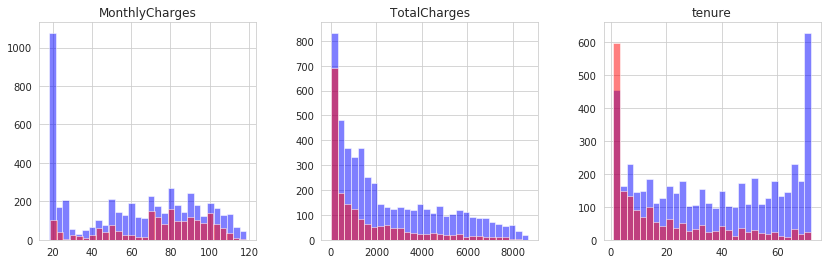

In [11]:
histogram, ax = plt.subplots(1, 3, figsize=(14, 4))
dataset[dataset.Churn == "No"][numerical].hist(bins=30, color="blue", alpha=0.5, ax=ax)
dataset[dataset.Churn == "Yes"][numerical].hist(bins=30, color="red", alpha=0.5, ax=ax)

MonthlyCharges and TotalCharges variable are dominantly right skewed, which means that there are more values on lower values. 

the tenure variable, the higher the value is, the less likely customer to churn.
Monthly charge shows that higher payment rate lead to churn
lower total charge seem to relate to churn, although it possibly correlate with tenure as it is the time of their stay

there is barely any pattern or correlation between MonthlyCharges variable and churn. The only observable trait is that the lower MonthlyCharges value would more likely not to churn.

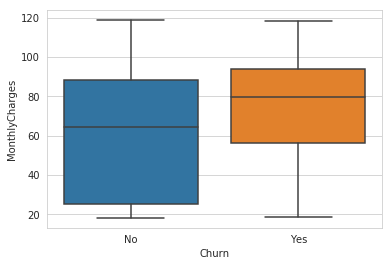

In [12]:
 axMonthlyCharges = sns.boxplot(x="Churn", y="MonthlyCharges", data=dataset)

there is some outliers on TotalCharges variable, especially the ones that churn. Most of the value is also quite low.

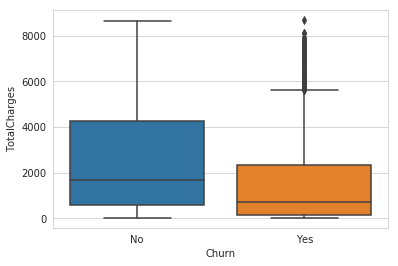

In [13]:
 axTotalCharges = sns.boxplot(x="Churn", y="TotalCharges", data=dataset)

 we saw a slight correlation from tenure and churn. The higher the value of tenure, the higher the tendency of not churning. On the other hand, the lower the tenure value, the higher the tendency to churn.

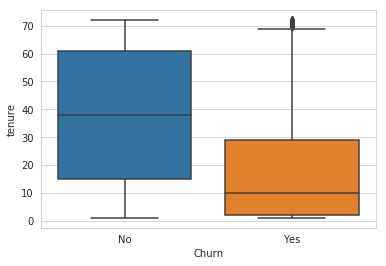

In [14]:
 axtenure = sns.boxplot(x="Churn", y="tenure", data=dataset)

### 2.1.3. Categorical Features

The first interesting variable to be analysed is InternetService variable. There are three types of value in the variable which are DSL, Fiber optic and No. DSL and No have low number of churns. However, on the Fiber Optic value, the number of churns is significantly higher compared to the other two variables.

The second interesting variable to analyse is Contract,  Contract also have three different values, which are Month-to-month, One year contract and Two year. One year and Two year value both have low number of churns. On the other hand, on Month-to-month value, it has a really high number of churns. Which makes Month-to-month value is suspiciously correlated with churn variable.

The third interesting variable is PaymentMethod, which is shown on figure 2.3.2.3. below. Unlike both previous variables, this particular variable has four values, which are Electronic check, Mailed check, Bank transfer (automatic) and Credit card (automatic). Mailed check, Bank transfer (automatic) and Credit card (automatic) have a really low number of churns. But, on Electronic check value, the number of churns is ridiculously high that its nearly as much as the number of customers that continue the service. Thus, Electronic check is suspected to be correlated with churn variable.

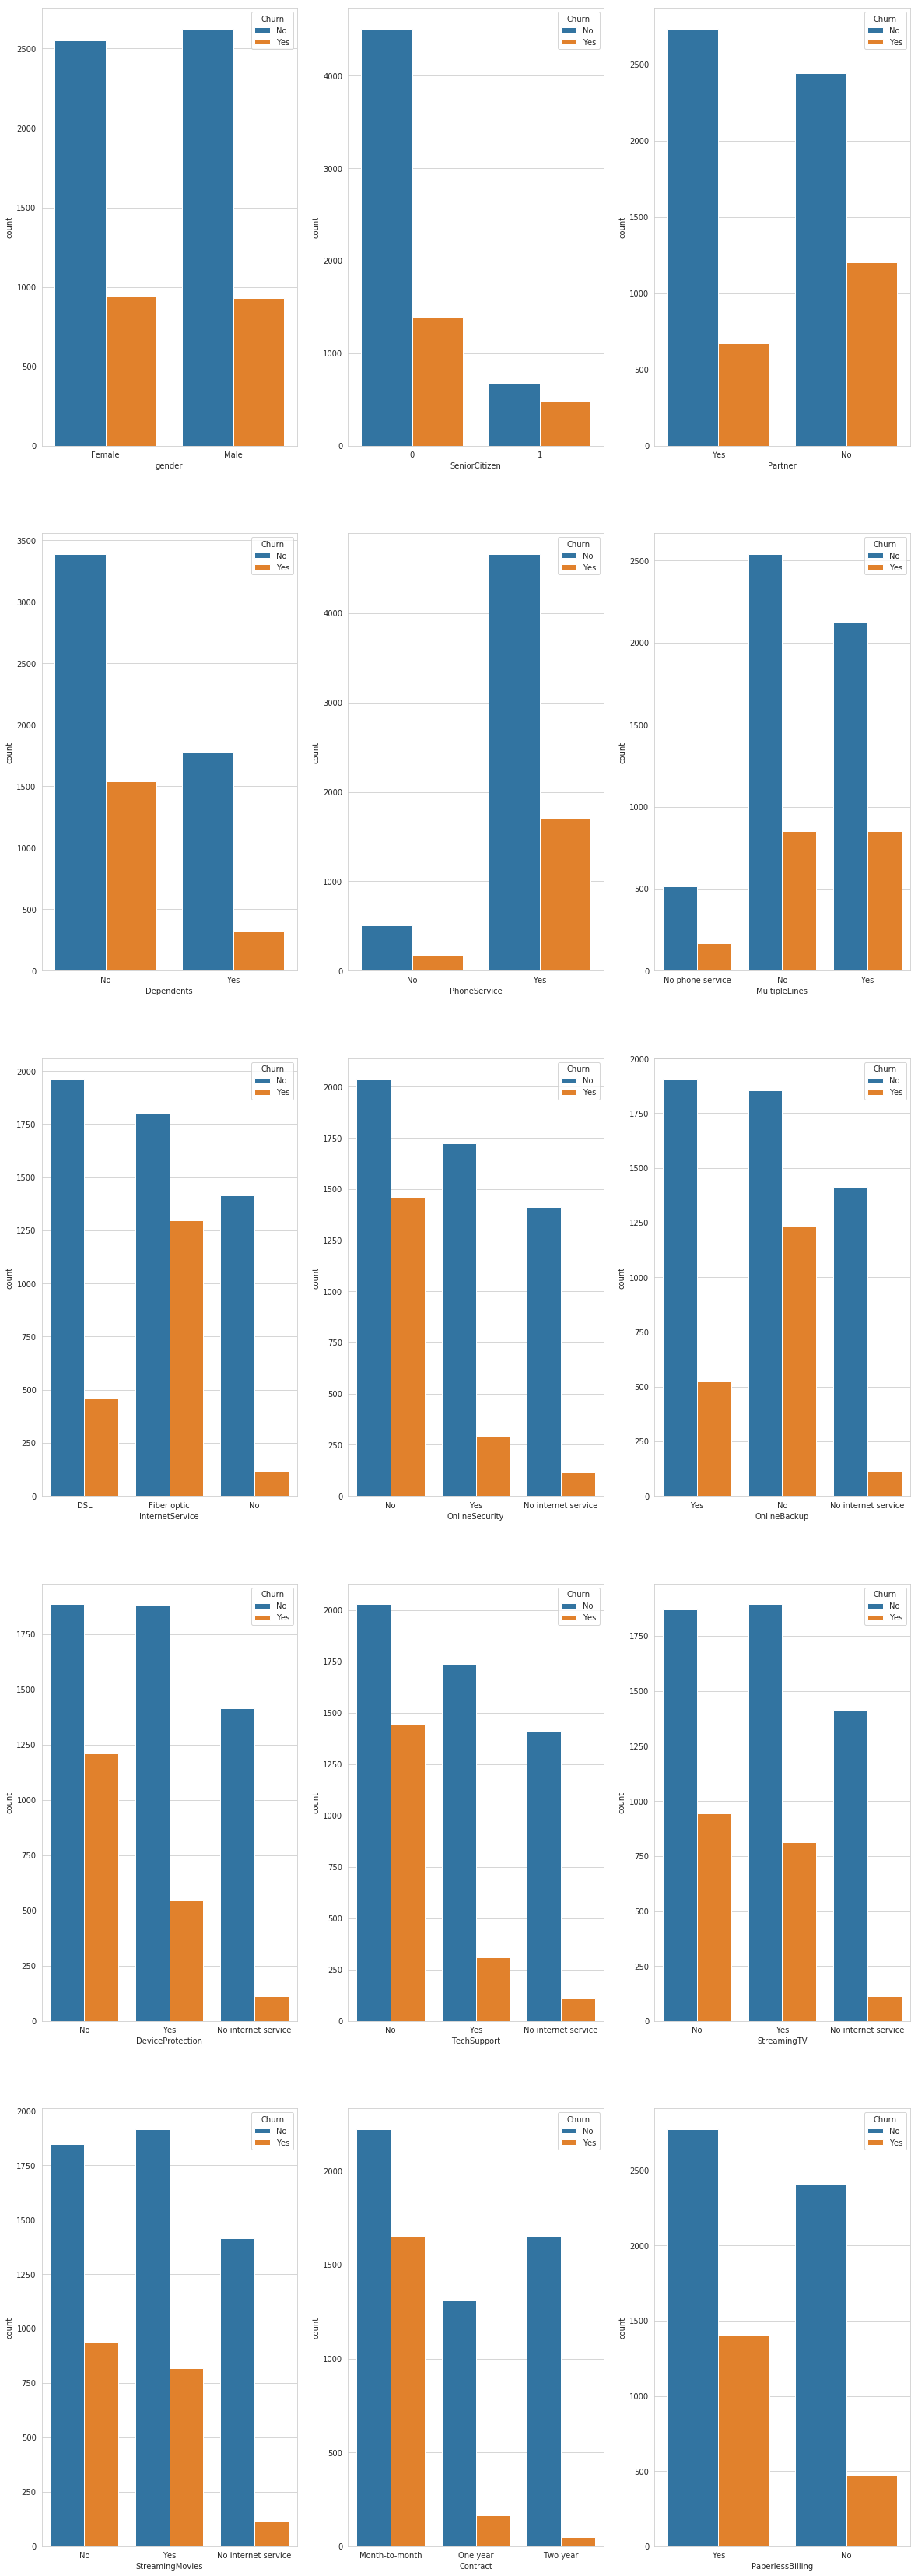

In [0]:
fig, ax = plt.subplots(5, 3, figsize=(20, 60))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot, hue= dataset['Churn'])


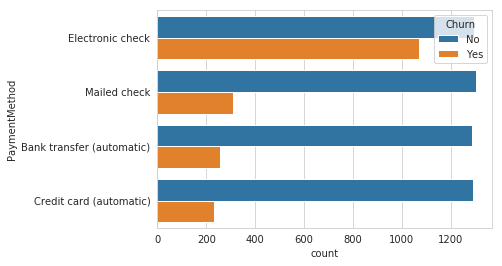

In [0]:
 paymentmethodchart = sns.countplot(y="PaymentMethod", hue="Churn", data=dataset)

### Churn
As can be seen from the distribution of Yes and No value is quite severe. There are total of 7043 customer data, 5169 of them are No (73.4%) and only 1874 of them are Yes (26.6%). This unbalanced distribution would create a problem when predicting the variable itself, therefore there would be need of oversampling by using bootstrapping or SMOTE, or even undersampling, which will be explained on the third section of the paper, data processing and transformation.

([<matplotlib.patches.Wedge at 0x7fd1b79c0470>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

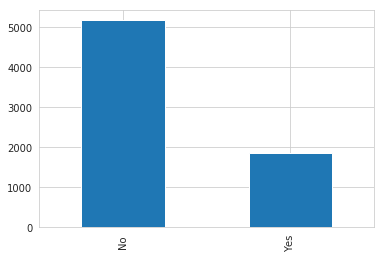

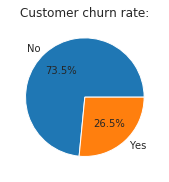

In [0]:
# Plot distribution of dependent/target variable - Churn column
dataset['Churn'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart may look more appealing
sizes = dataset['Churn'].value_counts(sort = True)
labels = np.unique(dataset.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Bar & pie plots below show that number of customers churned is less than half of not churned.

## 2.2. Initial Data & Model Plan Based on Evaluation
The data shows that it is moderately imbalanced. We’ll try to compare the classifiers based on the normal set, the oversampled set using SMOTE, and under sample set. Both of the resampled dataset are balanced in respect with the target variable. Aside from that we’ll use the assign class weight features and Boosting to see their effect.

# Methodology

After exploring our data thoroughly, we then proceed to pre-processing and transforming our datasets in order to create a usable classifier model. This project will adopt the CRISP-DM Methodology which is a well-known approach use for data mining projects



. This section will cover the Data Preparation that will be used to solve the challenges mentioned in the Exploration section as well as the modelling stage. the methodology stage is developed in section 3 to 5

# 3. Data Preprocessing & Transformation

## 3.1. Skewness Transformation
As real-world data unfortunately can’t be exactly distributed normally, we follow the general rule that if the skewness is between -0.5 and 0.5, to be more or less symmetric. In this project we used boxcox transformation from stats to produce a normal distribution

### 3.1.1. MonthlyCharges
As mentioned before the Monthly Charges skewness is still in an acceptable range as such no need to transform it, transforming it again might increase the skewness of the variable

In [0]:
dataset['MonthlyCharges'].skew() #as skew still below 0.5 it is not severely skewed.

-0.22210292770166232

In [0]:
dataset['MonthlyCharges'], _ =stats.boxcox(dataset['MonthlyCharges'])

### 3.1.2. TotalCharges
Initially the skewed is 0.96, which is quite severed, the exploration shows that the Total Charges is extremely right skewed. The boxcox transformation bring it down to -0.14, which is very close to normal distribution.

In [0]:
dataset['TotalCharges'].skew()

0.9616424997242504

In [0]:

dataset['TotalCharges'], _ = stats.boxcox(dataset['TotalCharges'])

dataset['TotalCharges'].skew()

-0.1457578687402694

### 3.1.3. Tenure
Tenure is skew around 0.23 which is similar to Monthly charges, it’s quite acceptable.

In [0]:
dataset['tenure'].skew() #not severely skewed no need to transformed

0.23773083190513133

In [0]:
np.log(dataset['tenure']).skew()

-0.960180204906086

In [0]:
print(dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 3.2. Dummy Variable
As most machine Learning algorithm and tools require numerical attributes, Binarized Variable is necessary in order to represent them in a not biased view. In this project we divide all the categories into 0 and 1 in a dummy variable form. The reason for not to do is as 0, 1 and 2 it’s because that the value of the variable is not ordinal, and thus the Label encoding form may give a sense of order that shouldn’t exists in the first place. Furthermore, this form allows us to assess the correlation of the matrices from the exploration section, and in using SMOTE resampling, as it doesn’t seem to accept categorical input.


The challenge then continues as the variables have more or less the same value name, thus when the get dummy method is used, it will produce the same column name, for instance the Dependents Yes will have the same name with Online Backup Yes. In order to tackle this, we do a column rename and append the original column name. Although there should be a more efficient way in handling this, we currently went with this solution. The disadvantage of this is that there are numerous columns, which will be discussed in the next section.

In [0]:
dummy_entity = pd.get_dummies(dataset['gender'])
del dummy_entity[dummy_entity.columns[-1]]

df_newentity = pd.concat([dataset, dummy_entity], axis=1)
del df_newentity['gender']

df_newentity

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),33.088878,22.722905,No,0
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.764563,10.182711,Yes,1
5,9305-CDSKC,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.158713,17.765087,Yes,1
6,1452-KIOVK,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),66.789280,23.115102,No,0
7,6713-OKOMC,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,23.626516,12.887698,No,1
8,7892-POOKP,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,77.733377,26.371416,Yes,1
9,6388-TABGU,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),43.275746,27.435283,No,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['Partner'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['Partner']

df_newentity = df_newentity.rename({ 'Yes': 'Partner','No' : 'PartnerNo'}, axis = 'columns')
del df_newentity['PartnerNo']

df_newentity.head(3)

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner
0,7590-VHVEG,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1
1,5575-GNVDE,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0
2,3668-QPYBK,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['Dependents'])

df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['Dependents']

df_newentity = df_newentity.rename({'Yes': 'Dependents','No' : 'DependentsNo'}, axis = 'columns')
del df_newentity['DependentsNo']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents
0,7590-VHVEG,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0
1,5575-GNVDE,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0
2,3668-QPYBK,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['PhoneService'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['PhoneService']

df_newentity = df_newentity.rename({'Yes': 'PhoneService','No' : 'PhoneServiceno'}, axis = 'columns')
del df_newentity['PhoneServiceno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService
0,7590-VHVEG,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0
1,5575-GNVDE,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1
2,3668-QPYBK,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1


In [0]:
dummy_entity = pd.get_dummies(df_newentity['MultipleLines'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['MultipleLines']

df_newentity = df_newentity.rename({'Yes': 'MultipleLines','No' : 'MultipleLinesno', 'No phone service' : 'MultipleLinesNoPhoneService'}, axis = 'columns')
del df_newentity['MultipleLinesno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines
0,7590-VHVEG,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0
1,5575-GNVDE,0,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0
2,3668-QPYBK,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['InternetService'])
del dummy_entity[dummy_entity.columns[-1]]

df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['InternetService']


df_newentity.head(3)

,customerID,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic
0,7590-VHVEG,0,1,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0
1,5575-GNVDE,0,34,Yes,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0
2,3668-QPYBK,0,2,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['OnlineSecurity'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['OnlineSecurity']

df_newentity = df_newentity.rename({'Yes': 'OnlineSecurity','No' : 'OnlineSecurityno', 'No internet service' : 'OnlineSecuritynoInternetService' }, axis = 'columns')
del df_newentity['OnlineSecurityno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity
0,7590-VHVEG,0,1,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0
1,5575-GNVDE,0,34,No,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1
2,3668-QPYBK,0,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1


In [0]:
dummy_entity = pd.get_dummies(df_newentity['OnlineBackup'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['OnlineBackup']

df_newentity = df_newentity.rename({'Yes': 'OnlineBackup', 'No' : 'OnlineBackupno', 'No internet service' : 'OnlineBackupnoInternetService' }, axis = 'columns')
del df_newentity['OnlineBackupno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup
0,7590-VHVEG,0,1,No,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,Yes,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,2,No,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1


In [0]:
dummy_entity = pd.get_dummies(df_newentity['DeviceProtection'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['DeviceProtection']

df_newentity = df_newentity.rename({'Yes': 'DeviceProtection','No' : 'DeviceProtectionno', 'No internet service' : 'DeviceProtectionnoInternetService' }, axis = 'columns')
del df_newentity['DeviceProtectionno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection
0,7590-VHVEG,0,1,No,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,0,34,No,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,0,2,No,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['TechSupport'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['TechSupport']

df_newentity = df_newentity.rename({'Yes': 'TechSupport','No' : 'TechSupportno', 'No internet service' : 'TechSupportnoInternetService' }, axis = 'columns')
del df_newentity['TechSupportno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport
0,7590-VHVEG,0,1,No,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,0,34,No,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,3668-QPYBK,0,2,No,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['StreamingTV'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['StreamingTV']

df_newentity = df_newentity.rename({'Yes': 'StreamingTV','No' : 'StreamingTVno', 'No internet service' : 'StreamingTVnoInternetService' }, axis = 'columns')
del df_newentity['StreamingTVno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV
0,7590-VHVEG,0,1,No,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,0,34,No,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,2,No,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['StreamingMovies'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['StreamingMovies']

df_newentity = df_newentity.rename({'Yes': 'StreamingMovies','No' : 'StreamingMoviesno', 'No internet service' : 'StreamingMoviesnoInternetService' }, axis = 'columns')
del df_newentity['StreamingMoviesno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies
0,7590-VHVEG,0,1,Month-to-month,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,34,One year,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,0,2,Month-to-month,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['Contract'])
del dummy_entity[dummy_entity.columns[-1]]

df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['Contract']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year
0,7590-VHVEG,0,1,Yes,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34,No,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,3668-QPYBK,0,2,Yes,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['PaperlessBilling'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['PaperlessBilling']
df_newentity = df_newentity.rename({'Yes': 'PaperlessBilling','No' : 'PaperlessBillingno'}, axis = 'columns')
del df_newentity['PaperlessBillingno']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year,PaperlessBilling
0,7590-VHVEG,0,1,Electronic check,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,5575-GNVDE,0,34,Mailed check,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3668-QPYBK,0,2,Mailed check,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


In [0]:
dummy_entity = pd.get_dummies(df_newentity['PaymentMethod'])
del dummy_entity[dummy_entity.columns[-1]]

df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['PaymentMethod']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check
0,7590-VHVEG,0,1,23.703018,5.399287,No,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,5575-GNVDE,0,34,43.857587,22.900956,No,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,2,41.599271,9.018523,Yes,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [0]:
dummy_entity = pd.get_dummies(df_newentity['Churn'])


df_newentity = pd.concat([df_newentity, dummy_entity], axis=1)
del df_newentity['Churn']
df_newentity = df_newentity.rename({'Yes' : 'Churn', 'No' : 'NOTCHURN'}, axis = 'columns')
del df_newentity['NOTCHURN']

df_newentity.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Churn
0,7590-VHVEG,0,1,23.703018,5.399287,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,0,34,43.857587,22.900956,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3668-QPYBK,0,2,41.599271,9.018523,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [0]:
print(df_newentity.isnull().sum())

customerID                           0
SeniorCitizen                        0
tenure                               0
MonthlyCharges                       0
TotalCharges                         0
Female                               0
Partner                              0
Dependents                           0
PhoneService                         0
MultipleLinesNoPhoneService          0
MultipleLines                        0
DSL                                  0
Fiber optic                          0
OnlineSecuritynoInternetService      0
OnlineSecurity                       0
OnlineBackupnoInternetService        0
OnlineBackup                         0
DeviceProtectionnoInternetService    0
DeviceProtection                     0
TechSupportnoInternetService         0
TechSupport                          0
StreamingTVnoInternetService         0
StreamingTV                          0
StreamingMoviesnoInternetService     0
StreamingMovies                      0
Month-to-month           

# 4. Feature Selection

## 4.1. Correlation Analysis

### 4.1.1. Unbalanced Dataset

In [0]:
df_newentity.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,49.083114,20.749319,0.495307,0.482509,0.298493,0.903299,0.096701,0.421928,0.343572,0.440273,0.216155,0.286547,0.216155,0.344852,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367,0.551052,0.209329,0.592719,0.219283,0.216297,0.336320,0.265785
std,0.368844,24.545260,21.888108,8.469342,0.500014,0.499729,0.457629,0.295571,0.295571,0.493902,0.474934,0.496455,0.411650,0.452180,0.411650,0.475354,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414,0.497422,0.406858,0.491363,0.413790,0.411748,0.472483,0.441782
min,0.000000,1.000000,14.669890,4.363219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,28.060506,14.153799,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,53.514405,20.916628,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,67.324123,28.116094,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,72.000000,87.348650,35.640407,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


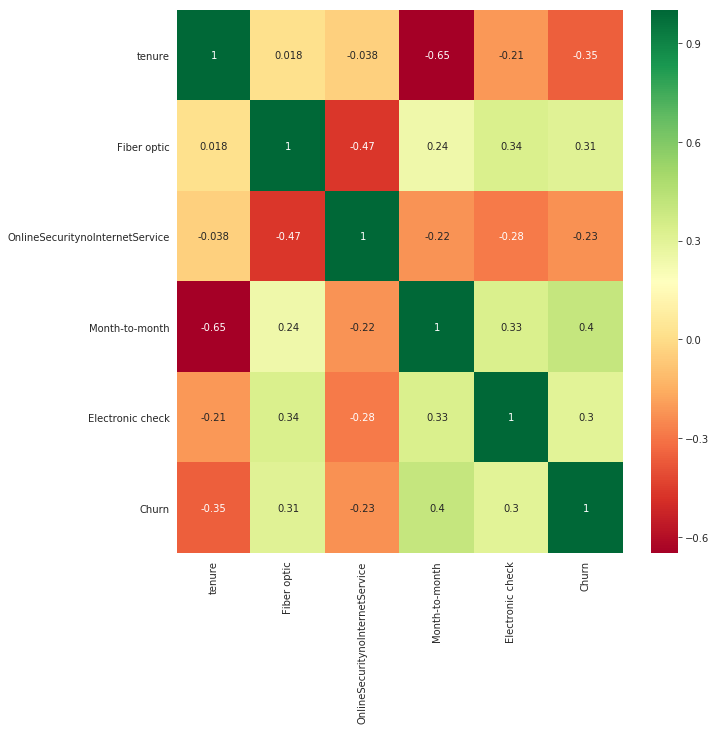

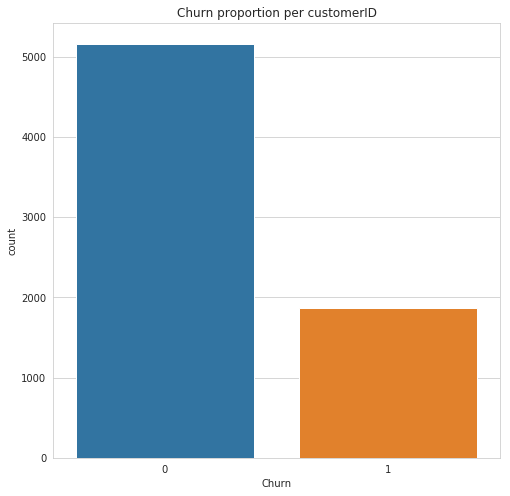

In [0]:
# Find the most correlated attributes
corrmat = df_newentity.corr()
top_corr_var = corrmat.index[abs(corrmat["Churn"])>0.2]

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
g = sns.heatmap(df_newentity[top_corr_var].corr(),
                annot=True,cmap="RdYlGn")

plt.figure(figsize=(8, 8))
sns.countplot('Churn', data=df_newentity)
plt.title('Churn proportion per customerID')
plt.show()

### 4.1.2. On Balanced Dataset using SMOTE Resampling

In [0]:
  del df_newentity['customerID']
  df_newentity.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Churn
0,0,1,23.703018,5.399287,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,34,43.857587,22.900956,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,41.599271,9.018523,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [0]:
from imblearn.over_sampling import SMOTE

sm = SMOTE( random_state=7, ratio='minority' )
oversampled_trainX, oversampled_trainY = sm.fit_sample(df_newentity.drop('Churn', axis=1), df_newentity['Churn'])

print('After OverSampling, the shape of train_X: {}'.format(oversampled_trainX.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(oversampled_trainY.shape))

print("After OverSampling, counts of label '1': {}".format(sum(oversampled_trainY==1)))
print("After OverSampling, counts of label '0': {}".format(sum(oversampled_trainY==0)))



After OverSampling, the shape of train_X: (10326, 30)
After OverSampling, the shape of train_y: (10326,) 

After OverSampling, counts of label '1': 5163
After OverSampling, counts of label '0': 5163


After OverSampling, the shape of train_X: (10326, 31)


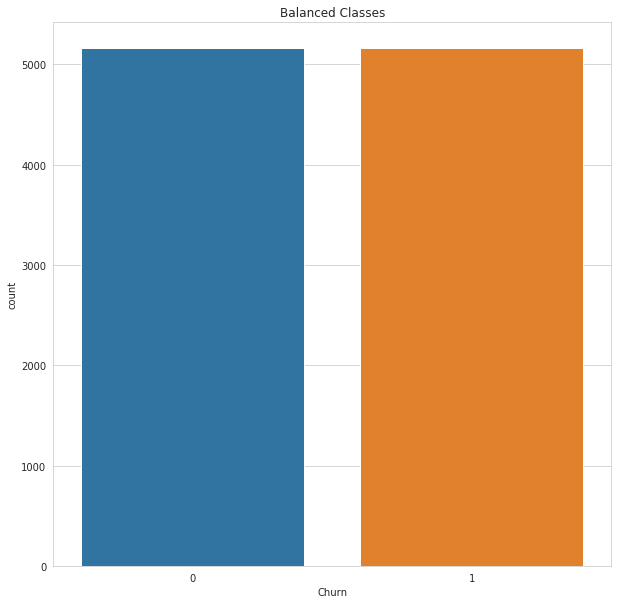

In [0]:
#combining them together
oversampled_df = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_df.columns = df_newentity.columns

print('After OverSampling, the shape of train_X: {}'.format(oversampled_df.shape))

plt.figure(figsize=(10, 10))
sns.countplot('Churn', data=oversampled_df)
plt.title('Balanced Classes')
plt.show()


This section of this paper would show a correlation matrix and actually shows which are the variables that actually have a correlation with churn variable. However, it will not show all the variable, because it would make the correlation matrix enormous. As a result, the correlation matrix will only show the variables that have more than 0.25 correlation. The result from the matrix is quite interesting.
The first finding is that TotalCharges and tenure variable is highly correlated, therefore if put into classifier, it would cause multicollinearity which is bad for the accuracy output. The second finding is that there are six variable that identically the same, which are OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. The correlation for six of these variables is one, then it can be concluded that they are actually the same. 

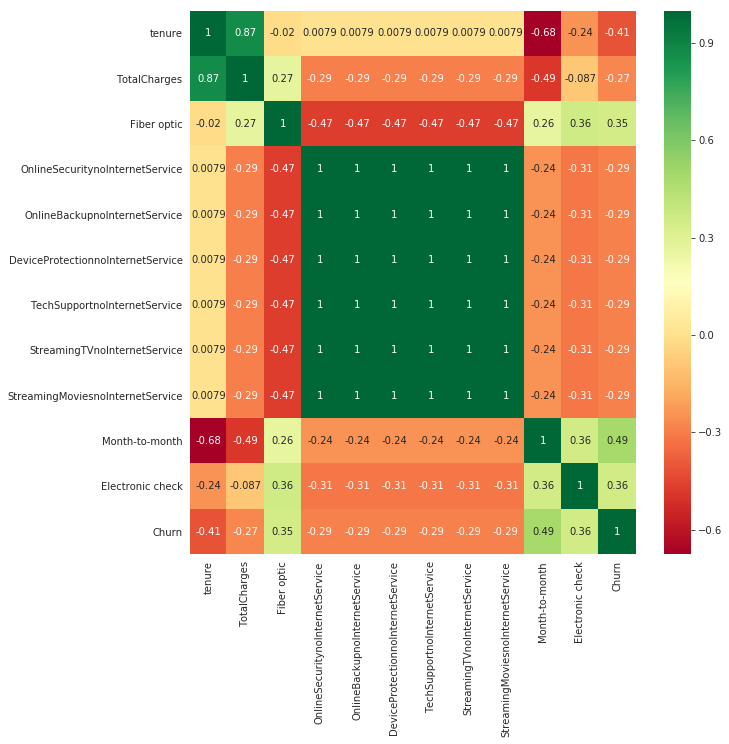

In [0]:
# Find the most correlated attributes
corrmat = oversampled_df.corr()
top_corr_var = corrmat.index[abs(corrmat["Churn"])>0.26]

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
g = sns.heatmap(oversampled_df[top_corr_var].corr(),
                annot=True,cmap="RdYlGn")


In [0]:
df_newentity.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,OnlineSecuritynoInternetService,OnlineSecurity,OnlineBackupnoInternetService,OnlineBackup,DeviceProtectionnoInternetService,DeviceProtection,TechSupportnoInternetService,TechSupport,StreamingTVnoInternetService,StreamingTV,StreamingMoviesnoInternetService,StreamingMovies,Month-to-month,One year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Churn
0,0,1,23.703018,5.399287,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,34,43.857587,22.900956,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,41.599271,9.018523,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


## 4.2. Store new Dataset

The No internet service attributes from onlinesecurity, onlinebackup, deviceprotection, techsupport, Streaming TV and Movies, are identically the same, keep 1 and rename to nointernetservice.

In [0]:
del df_newentity['OnlineBackupnoInternetService']
del df_newentity['DeviceProtectionnoInternetService']
del df_newentity['TechSupportnoInternetService']
del df_newentity['StreamingTVnoInternetService']
del df_newentity['StreamingMoviesnoInternetService']
del df_newentity['TotalCharges']

In [0]:
processed_df = df_newentity.rename(columns = {"OnlineSecuritynoInternetService": "No Internet Service"}) 

In [0]:
processed_df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,Female,Partner,Dependents,PhoneService,MultipleLinesNoPhoneService,MultipleLines,DSL,Fiber optic,No Internet Service,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Month-to-month,One year,PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Churn
0,0,1,23.703018,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,0,34,43.857587,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,2,41.599271,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
3,0,45,33.088878,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
4,0,2,53.764563,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1


## 4.3. Feature Selection
Aside from correlation Matrix we also did a Feature Selection based on all the categories and sort out the first top 10. The goal of this is to reduce the number of predictors into the model, as the curse of dimensionality might deteriorate the model performance. Feature selection is also useful for training regularisation and time.

In [0]:

from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(processed_df.drop('Churn', axis=1),processed_df['Churn'])
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(processed_df.drop('Churn', axis=1).columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs         Score
1                tenure  16377.328093
2        MonthlyCharges   2599.535438
18       Month-to-month    516.714004
23     Electronic check    424.113152
10          Fiber optic    372.082851
11  No Internet Service    285.475152
19             One year    176.608724
12       OnlineSecurity    147.165601
15          TechSupport    135.439602
0         SeniorCitizen    133.482766


In [0]:
processed_df[{'tenure','MonthlyCharges', 'Fiber optic', 'Month-to-month', 'Electronic check', 'Churn'}]

# 5. Modelling

In this section we will approach the techniques of several model such as
1. ADABOOST
2. Logistic Regression
3. Random Forest
4. Gradient Boost

we wil then compared each of the results on a normal training set vs balanced training set & observe how it will improve the model in general

## 5.1. Train and Test Partition
the dataset is partition into 2 section the Train and the Test with around 30% for the test set. Test set is around 2300 data, while training set around 4700.

In [0]:
from sklearn.model_selection import train_test_split

X = processed_df.drop('Churn', axis=1)
y = processed_df['Churn']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## 5.2. Generate Balanced Training set

### 5.2.1  SMOTE Oversampling
Synthetic Minority Over-Sampling Techniques (SMOTE) aims to oversample the minority class with their generated synthetic sample. It tries to find its K minority class neighbour and make new instances between those lines. The advantage of this method is that it generates new synthetics one, without replicating it and no information is loss, however it’s not ideal with high dimensional data.

In [0]:
from imblearn.over_sampling import SMOTE

sm = SMOTE( random_state=7 )
oversampled_trainXSMOTE, oversampled_trainYSMOTE = sm.fit_sample(X_train, y_train )

print('After OverSampling, the shape of train_X: {}'.format(oversampled_trainXSMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(oversampled_trainYSMOTE .shape))

print("After OverSampling, counts of label '1': {}".format(sum(oversampled_trainYSMOTE ==1)))
print("After OverSampling, counts of label '0': {}".format(sum(oversampled_trainYSMOTE ==0)))

After OverSampling, the shape of train_X: (6904, 24)
After OverSampling, the shape of train_y: (6904,) 

After OverSampling, counts of label '1': 3452
After OverSampling, counts of label '0': 3452


###  5.2.2. Undersampling
Random Under sampling works by eliminating rows from dominant class randomly. This can cause the class to be balanced, while improving the model run time and memory issue. However important information belonging to the Majority class could be loss, and might reduce the model performance in the end (REFERENCE). To solve this, it would be better if the sampling was taken per cluster/category ensuring that all important samples are still retained

In [0]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
X_undersample, y_undersample = rus.fit_resample(X_train,y_train)
print(sorted(Counter(y_undersample).items()))


[(0, 1259), (1, 1259)]


## 5.3. Importing Evaluation Metrics Library

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

## 5.4. ADABOOST Classifier
AdaBoost which is the short for adaptive boosting works by fitting sequence of weak learners on different weighted training data. It begins with predicting original data set and gives equal weight to the observation. However, it does not end there, if the first learner is incorrect, then it will give higher weight to observation that had been predicted incorrectly. It would repeat itself again and again until high accuracy is achieved. AdaBoost is one of the implemented classification techniques that will be used to predict the churn variable. The implementation code will be shown below, and the result with further explanation will be written on the evaluation part of the paper.



In [0]:
from sklearn.ensemble import AdaBoostClassifier

### 5.4.1. Unbalanced Training Set

In [0]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
Adaboostclf = abc.fit(X_train, y_train)
y_pred_adaboost = Adaboostclf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_adaboost))

Accuracy: 0.8035329599310642


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_adaboost)
print(confusion_matrix)

[[1529  182]
 [ 274  336]]


In [0]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1711
           1       0.65      0.55      0.60       610

    accuracy                           0.80      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.80      0.80      2321



### 5.4.2. Balanced Training Set

 5.4.2.3. Oversample

In [0]:
abcSMOTE = AdaBoostClassifier(n_estimators=50, learning_rate=1)
AdaboostclfSMOTE = abcSMOTE.fit(oversampled_trainXSMOTE, oversampled_trainYSMOTE)
y_pred_adaboostSMOTE = AdaboostclfSMOTE.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_adaboostSMOTE))

Accuracy: 0.7815596725549332


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_adaboostSMOTE)
print(confusion_matrix)

[[1407  304]
 [ 203  407]]


In [0]:
print(classification_report(y_test, y_pred_adaboostSMOTE))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1711
           1       0.57      0.67      0.62       610

    accuracy                           0.78      2321
   macro avg       0.72      0.74      0.73      2321
weighted avg       0.79      0.78      0.79      2321



5.4.2.2. Undersample

In [0]:
abcunder = AdaBoostClassifier(n_estimators=50, learning_rate=1)
Adaboostclfunder = abcunder.fit(X_undersample, y_undersample)
y_pred_adaboostunder = Adaboostclfunder.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_adaboostunder))

Accuracy: 0.7238259370960792


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_adaboostunder)
print(confusion_matrix)

[[1180  531]
 [ 110  500]]


In [0]:
print(classification_report(y_test, y_pred_adaboostunder))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1711
           1       0.48      0.82      0.61       610

    accuracy                           0.72      2321
   macro avg       0.70      0.75      0.70      2321
weighted avg       0.80      0.72      0.74      2321



## 5.5. Logistic Regression
Another classification method that will be used to predict churn is logistic regression. Logistic regression is different from normal regression. Rather than predicting a value of a numeric variable, it predicts the probability that the given input point belongs to a certain class. The main idea of logistic regression is that the input space can be separated into two ‘regions’ by a linear discriminant. This boundary will help to decide predicting the output value. The implementation code will be shown below, and the result with further explanation will be written on the evaluation part of the paper.

In [0]:
from sklearn.linear_model import LogisticRegression

### 5.5.1. Unbalanced Training Set

In [0]:
logisticclf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)

In [0]:
y_logistic_pred = logisticclf.predict(X_test)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticclf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_logistic_pred)
print(confusion_matrix)

[[1533  178]
 [ 289  321]]


In [0]:
print(classification_report(y_test, y_logistic_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.64      0.53      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



### 5.5.2. Balanced Training Set

5.5.2.1.Oversampling

In [0]:
logisticclfSMOTE = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(oversampled_trainXSMOTE , oversampled_trainYSMOTE)

In [0]:
y_predSMOTE= logisticclfSMOTE.predict(X_test)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticclfSMOTE.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrixSMOTE = confusion_matrix(y_test, y_predSMOTE)
print(confusion_matrixSMOTE)

[[1244  467]
 [ 122  488]]


In [0]:
print(classification_report(y_test, y_predSMOTE))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1711
           1       0.51      0.80      0.62       610

    accuracy                           0.75      2321
   macro avg       0.71      0.76      0.72      2321
weighted avg       0.81      0.75      0.76      2321



5.5.2.2. Undersampling

In [0]:
LogisticclfUnder = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_undersample, y_undersample)

In [0]:
y_predUNDER= LogisticclfUnder.predict(X_test)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogisticclfUnder.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrixUnder = confusion_matrix(y_test, y_predUNDER)
print(confusion_matrixUnder)

[[1243  468]
 [ 123  487]]


In [0]:
print(classification_report(y_test, y_predUNDER))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1711
           1       0.51      0.80      0.62       610

    accuracy                           0.75      2321
   macro avg       0.71      0.76      0.72      2321
weighted avg       0.80      0.75      0.76      2321



## 5.6 Random Forest
Random forest is a particularly smart classification method, because it takes decision tree classifier to another level. Because, it is basically a classification with multiple decision tree that operate as an ensemble inside of them. However, even though there are a lot of decision trees in the model, it does not mean they are related, in fact the decision trees are uncorrelated, this would allow trees to protect each other from individual errors which
 The implementation code will be shown below, and the result with further explanation will be written on the evaluation part of the paper.

In [0]:
from sklearn.ensemble import RandomForestClassifier

### 5.6.1. Unbalanced Training Set

In [0]:
#Create a Gaussian Classifier
RandomForestclf=RandomForestClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 11, min_samples_split = 2, 
                          min_samples_leaf = 8, n_jobs = -1 , random_state = 42, class_weight = {0:0.95, 1:2} )

#Train the model
RandomForestclf.fit(X_train,y_train)
y_pred_randomforest=RandomForestclf.predict(X_test)

In [0]:
#Check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_randomforest))

Accuracy: 0.7759586385178803


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_randomforest)
print(confusion_matrix)

[[1357  354]
 [ 166  444]]


In [0]:
print(classification_report(y_test, y_pred_randomforest))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1711
           1       0.56      0.73      0.63       610

    accuracy                           0.78      2321
   macro avg       0.72      0.76      0.73      2321
weighted avg       0.80      0.78      0.78      2321



### 5.6.2. Balanced Training Set

5.6.2.1. Oversample

In [0]:

RandomForestclfSMOTE=RandomForestClassifier(n_estimators = 1000, max_features = 'log2', max_depth = 11, min_samples_split = 2, 
                          min_samples_leaf = 8, n_jobs = -1 , random_state = 42, class_weight = {0:0.95, 1:2})
RandomForestclfSMOTE.fit(oversampled_trainXSMOTE, oversampled_trainYSMOTE)
y_predRandomForestSMOTE=RandomForestclfSMOTE.predict(X_test)

In [0]:
#Check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_predRandomForestSMOTE))

Accuracy: 0.7358897027143473


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predRandomForestSMOTE)
print(confusion_matrix)

[[1216  495]
 [ 118  492]]


In [0]:
print(classification_report(y_test, y_predRandomForestSMOTE))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1711
           1       0.50      0.81      0.62       610

    accuracy                           0.74      2321
   macro avg       0.71      0.76      0.71      2321
weighted avg       0.80      0.74      0.75      2321



5.6.2.2. Undersample

In [0]:
RandomForestclfunder=RandomForestClassifier(n_estimators = 99, max_features = 'auto', max_depth = 11, min_samples_split = 2, 
                          min_samples_leaf = 8 , random_state = 42, class_weight = {0:1, 1:2})

RandomForestclfunder.fit(X_undersample, y_undersample)
y_predRandomForestunder=RandomForestclfunder.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predRandomForestunder))

Accuracy: 0.6596294700560104


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predRandomForestunder)
print(confusion_matrix)

[[981 730]
 [ 60 550]]


In [0]:
print(classification_report(y_test, y_predRandomForestunder))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1711
           1       0.43      0.90      0.58       610

    accuracy                           0.66      2321
   macro avg       0.69      0.74      0.65      2321
weighted avg       0.81      0.66      0.68      2321



## 5.7. Gradient Boosting Classifier
Gradient boosting trains models by gradual, additive and sequential manner. As the name suggest, Gradient Boost and AdaBoost, both of them work quite similarly. However, the main difference between gradient boost and adaptive boost is how they change weak classification to a strong one. While adaptive boost identifies shortcomings by high weigh data points, gradient boosting identifies them by using loss function. The loss function measurement would indicate how good the model’s coefficient are fitting to the data itself. Therefore, it is one of the most prominent boosting algorithms that people use. The implementation code will be shown below, and the result with further explanation will be written on the evaluation part of the paper.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

### 5.7.1. Unbalanced Dataset

In [0]:
GradientBoostclf = GradientBoostingClassifier(n_estimators=99)
GradientBoostclf .fit(X_train, y_train)
y_predgradientboost = GradientBoostclf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predgradientboost))

Accuracy: 0.8013787160706592


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predgradientboost)
print(confusion_matrix)

[[1544  167]
 [ 294  316]]


In [0]:
print(classification_report(y_test, y_predgradientboost))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.52      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



### 5.7.2. Balanced Dataset

5.7.2.1. Undersample

In [0]:
GradientBoostclfUnder = GradientBoostingClassifier(n_estimators=99)
GradientBoostclfUnder .fit(X_undersample, y_undersample)
y_predgradientboostUnder = GradientBoostclfUnder.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predgradientboostUnder))

Accuracy: 0.7302886686772943


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predgradientboostUnder)
print(confusion_matrix)

[[1194  517]
 [ 109  501]]


In [0]:
print(classification_report(y_test, y_predgradientboostUnder))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1711
           1       0.49      0.82      0.62       610

    accuracy                           0.73      2321
   macro avg       0.70      0.76      0.70      2321
weighted avg       0.80      0.73      0.75      2321



5.7.2.2.  SMOTE Oversample

In [0]:
GradientBoostclfOver = GradientBoostingClassifier(n_estimators=99)
GradientBoostclfOver.fit(oversampled_trainXSMOTE, oversampled_trainYSMOTE)
y_predgradientboostOver = GradientBoostclfOver.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predgradientboostOver))

Accuracy: 0.7888841016803102


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predgradientboostOver)
print(confusion_matrix)

[[1462  249]
 [ 241  369]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predgradientboostOver))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1711
           1       0.60      0.60      0.60       610

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321



# Evaluation

In evaluation of the models, we’ll focus on the classification report provided by the metrics. This evaluation will be compared for each classifier, in normal, oversampled, under sampled set based on 3 assessment.
Precision – how precise your model is based on its predicted values
Recall- how many that your model correctly classified based on the actual one
F1-Score – Balance measure between Precision & Recall

     
As previously mentioned in the introduction, the goal is to be able to target as many of Churn customers in order to make them stay. At first glance the Recall values seem to be the appropriate metrics as it focus on the actual value/ real churn. However, as companies and organisation have different budgets and network, there’s no guarantee that they can target all of them, or will they, considering that the accuracy is low, since they need to target lots of not churn customer as well. Also the accuracy of the models can generate a probability score, of customers that will churn, if the accuracy is quite reliable. So that we can tackle both of this concerns, we will rank them based on the F1-Score, and if theirs’s a tie between models, we’ll settle it with the one with the highest recall. In the next section, we will only display the best values for each classifier, since the rest can be found in the code




# Conclusion
As the previous section suggest, there are two main components that are highly regarded in this prediction model. Which is the accuracy of the recall and f1-score. The performance of four methods are eerily similar. All of them had quite good performance in general, however there is only one method that produce the best result, which is gradient boost using under sampled dataset with 0.62 and 0.82, F1 and recall respectively.

There are various improvement that we think will be suitable to improve the model in general, such as implementing the Cluster Under sampling to reduce the potential of information loss, exploring other type of models, such as XGBOOST classifier, neural network, SVM, and for the telco company in order to give the best retention approach to the customers, it’s possible to build a customer segmentation model, based on their details such as tenure, and monthly charges.

# Ethics
Data is more prominent now than ever, there are a lot of methods and techniques to gather data. However, there are a lot of times where the data collected is not collected by consent, meaning it was collected unknowingly, and the subject might not want its data to be collected.

For this particular churn dataset, we personally think that the dataset is ethical, because it does not contain sensitive information about the customer such as their address, name, partners name, etc. Rather than the customer data itself, it emphasises more to the service data that they provide for the customer. And it proves that a dataset does not have to contain a lot of customer’s personal information to be able to get a good prediction result.

In the age where technology is getting more and even better, more laws and regulations about data usage and data collection must be revised, improved and renewed in order to secure all of people’s personal and sensitive data.